In [2]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [4]:
bank_df = pd.read_csv('bank.csv')

In [5]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
bank_df.shape

(11162, 17)

In [8]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


array([[<Axes: title={'center': 'age'}>]], dtype=object)

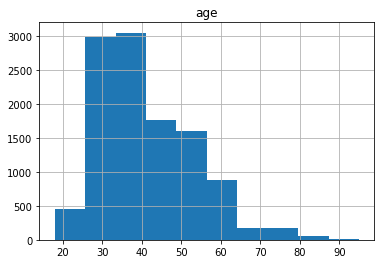

In [9]:
bank_df.hist(column= 'age')

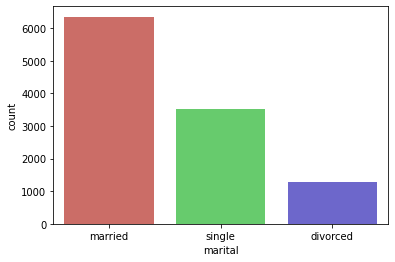

In [10]:
import seaborn as sns
g=sns.countplot(x = 'marital', data= bank_df, palette = 'hls')

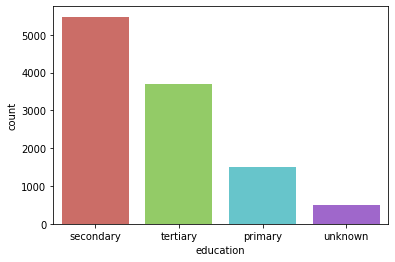

In [11]:
g=sns.countplot(x = 'education', data= bank_df, palette = 'hls')

In [12]:
from sklearn.preprocessing import LabelEncoder as Lb

encoder = Lb() 

In [13]:
col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

bank_df[col] = bank_df[col].apply(encoder.fit_transform)

In [14]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,yes
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,yes
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,yes
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,yes
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,yes


In [15]:
x = bank_df[['age','job','marital','education','default','balance','housing','loan','contact','day', 'month','duration','campaign', 'pdays', 'previous', 'poutcome']]

y = bank_df['deposit']

In [16]:
encoder = Lb()
encoder.fit(y)
encoded_Y = encoder.transform(y)


Y = to_categorical(encoded_Y)

In [17]:
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x,Y, test_size = 0.2, random_state=30)

X_model, X_val, y_model, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [32]:
model = Sequential([

Dense(75, input_dim =16, activation ='relu'),
Dense(75, activation='relu'),
Dense(2,activation='sigmoid')
])

In [34]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(X_model, y_model, validation_data= (X_val, y_val), epochs=100, batch_size = 90)

Epoch 1/100
80/80 [==============================] - 2s 8ms/step - loss: 1.2262 - accuracy: 0.7619 - val_loss: 0.7865 - val_accuracy: 0.7917
Epoch 2/100
80/80 [==============================] - 0s 4ms/step - loss: 0.8136 - accuracy: 0.7649 - val_loss: 0.8588 - val_accuracy: 0.7900
Epoch 3/100
80/80 [==============================] - 0s 5ms/step - loss: 0.8004 - accuracy: 0.7579 - val_loss: 1.1763 - val_accuracy: 0.7150
Epoch 4/100
80/80 [==============================] - 0s 5ms/step - loss: 1.0799 - accuracy: 0.7404 - val_loss: 0.8794 - val_accuracy: 0.7951
Epoch 5/100
80/80 [==============================] - 0s 4ms/step - loss: 0.7521 - accuracy: 0.7691 - val_loss: 0.6451 - val_accuracy: 0.7788
Epoch 6/100
80/80 [==============================] - 0s 5ms/step - loss: 0.6612 - accuracy: 0.7777 - val_loss: 1.3218 - val_accuracy: 0.7548
Epoch 7/100
80/80 [==============================] - 0s 4ms/step - loss: 0.9108 - accuracy: 0.7599 - val_loss: 0.7939 - val_accuracy: 0.7693
Epoch 8/100
8

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 75)                1275      
                                                                 
 dense_16 (Dense)            (None, 75)                5700      
                                                                 
 dense_17 (Dense)            (None, 2)                 152       
                                                                 
Total params: 7,127
Trainable params: 7,127
Non-trainable params: 0
_________________________________________________________________


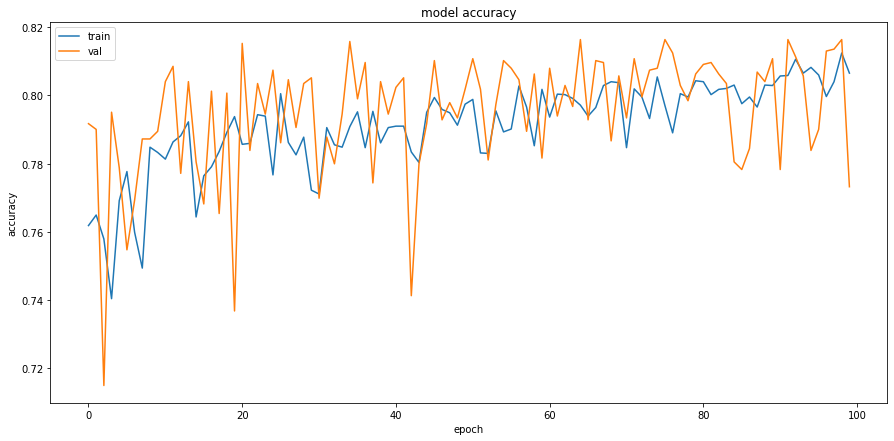

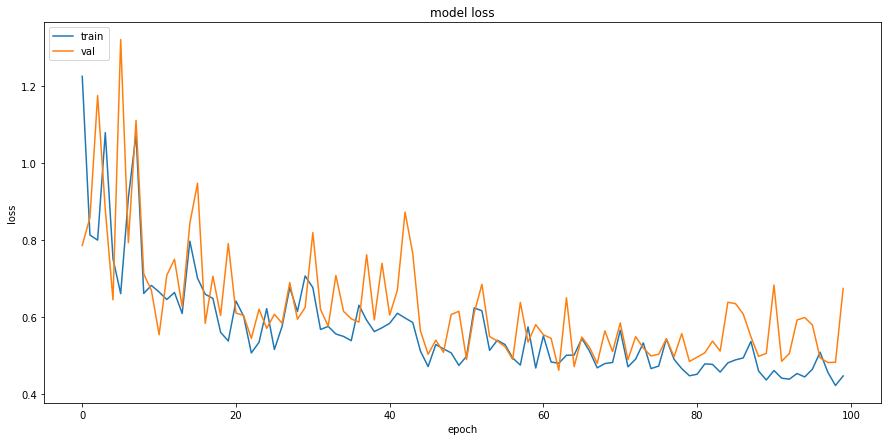

In [38]:
# summarize history for accuracy
plt.figure(figsize =(15,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize =(15,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
y_pred = model.predict(X_test)


70/70 [==============================] - 1s 3ms/step


In [41]:
y_pred

array([[2.7217318e-06, 9.9996835e-01],
       [4.6789546e-02, 9.6598256e-01],
       [6.6535342e-01, 2.5075871e-01],
       ...,
       [2.5242612e-01, 7.6940387e-01],
       [4.5132291e-02, 8.8805336e-01],
       [7.3001966e-02, 9.5338005e-01]], dtype=float32)

In [42]:
from sklearn.metrics import accuracy_score
import numpy as np

pred = []

for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))

test = []

for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))


print(f'The accuracy on test data is {accuracy_score(pred,test)}')

The accuracy on test data is 0.7751903269144649
